In [367]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [368]:
diamonds = pd.read_csv('../data/diamonds.csv')
default_plot_color = sns.color_palette()[0]

In [369]:
print(diamonds.shape)
print(diamonds.dtypes)
diamonds.head(10)

(53940, 10)
carat      float64
cut         object
color       object
clarity     object
depth      float64
table      float64
price        int64
x          float64
y          float64
z          float64
dtype: object


,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
5,0.24,Very Good,J,VVS2,62.8,57.0,336,3.94,3.96,2.48
6,0.24,Very Good,I,VVS1,62.3,57.0,336,3.95,3.98,2.47
7,0.26,Very Good,H,SI1,61.9,55.0,337,4.07,4.11,2.53
8,0.22,Fair,E,VS2,65.1,61.0,337,3.87,3.78,2.49
9,0.23,Very Good,H,VS1,59.4,61.0,338,4.00,4.05,2.39


### Convert "cut", "color", and "clarity" into ordered categorical types

In [370]:
ordinal_var_dict = {'cut': ['Fair', 'Good', 'Very Good', 'Premium', 'Ideal'],
                    'color': ['J', 'I', 'H', 'G', 'F', 'E', 'D'],
                    'clarity': ['I1', 'SI2', 'SI1', 'VS2', 'VS1', 'VVS2', 'VVS1', 'IF']}

for var in ordinal_var_dict:
    ordered_var = pd.api.types.CategoricalDtype(ordered=True,
                                                categories=ordinal_var_dict[var])
    diamonds[var] = diamonds[var].astype(ordered_var)

### Price vs Weight

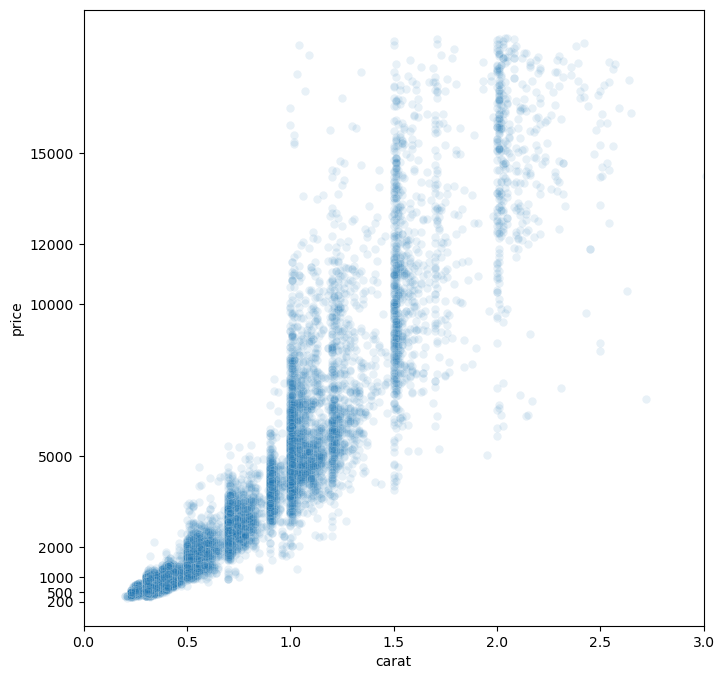

In [371]:
plt.figure(figsize=[8, 8])
sns.scatterplot(data=diamonds.sample(frac=.2), x='carat', y='price', alpha=.1)

plt.xlim(0, 3)

yticks = [200, 500, 1000, 2000, 5000, 10000, 12000, 15000]
plt.yticks(yticks, yticks);

Before we plotted against the price, we should have remembered that our price had to be log-scaled in the our univariate exploration to see the bimodal distribution. Thus, our first plot should have been the log-transformed price against weight.

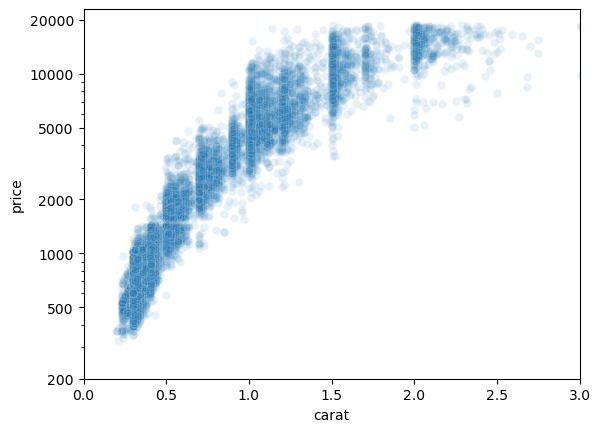

In [388]:
sns.scatterplot(data=diamonds.sample(frac=.2), x='carat', y='price', alpha=.1)

plt.yscale('log')
plt.xlim(0, 3)

yticks = [200, 500, 1000, 2000, 5000, 10000, 20000]
plt.yticks(yticks, yticks);

From the above plot, we observe the log of prices does not trend linearly with the carat weight. However, as we can see below, it turns out volume follows a linear trend with price.

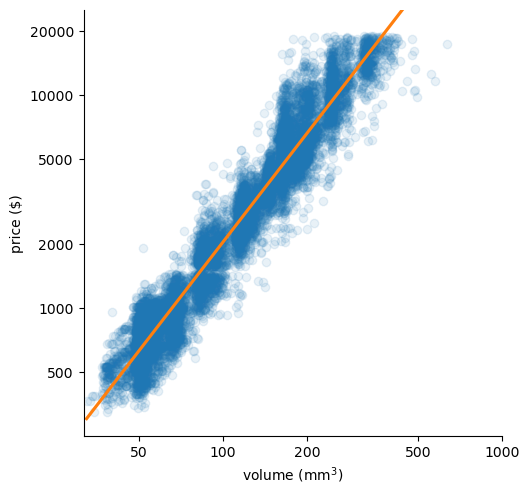

In [373]:
diamonds_sub = diamonds.sample(frac=.2)

diamonds_sub['log_price'] = np.log10(diamonds_sub['price'])
diamonds_sub['volume'] = diamonds_sub['x'] * diamonds_sub['y'] * diamonds_sub['z']
diamonds_sub = diamonds_sub.drop(diamonds_sub[diamonds_sub['volume'] < 1e-6].index)
diamonds_sub['log_volume'] = np.log10(diamonds_sub['volume'])

sns.FacetGrid(data=diamonds_sub, height=5).map(sns.regplot, 'log_volume', 'log_price', scatter_kws={'alpha':.1}, line_kws={'color':sns.color_palette()[1]})

plt.xlim(1.5, 2.9)
plt.ylim(2.4, 4.4)

yticks = [500, 1000, 2000, 5000, 10000, 20000]
plt.yticks(np.log10(yticks), yticks)
plt.ylabel('price ($)')

xticks = np.array([50, 100, 200, 500, 1000])
plt.xticks(np.log10(xticks), xticks)
plt.xlabel('volume (mm$^3$)');

Given this piece of information and knowing weight is proportional to volume, we can take the cube root transformation of our weights. After doing so, we do in fact observe a linear trend between the log of prices and cube root of weights.

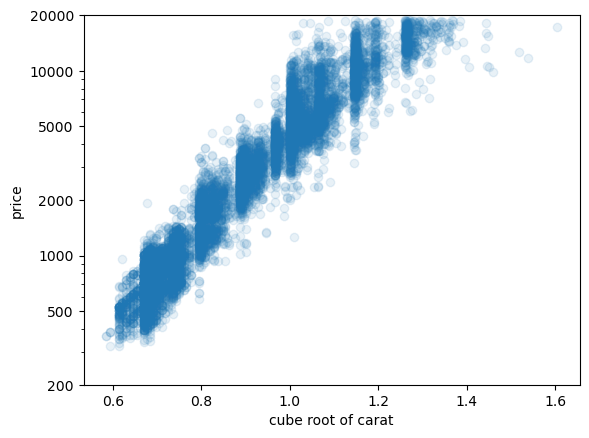

In [387]:
plt.scatter(x=diamonds_sub['carat']**(1/3), y=diamonds_sub['price'], alpha=.1)

plt.xlabel('cube root of carat')

plt.yscale('log')
yticks = [200, 500, 1000, 2000, 5000, 10000, 20000]
plt.ylim(200, 20000)
plt.yticks(yticks, yticks)
plt.ylabel('price');

One last consideration is that given the prices are cut off above \$20K, we should be wary of effects of diamonds above 1.5 carats given the linear trend that would make the price above $20K more likely.

# Price vs Categorical Comparisons

What's interesting about each of the below plots is that the price for diamonds *decreases* with *increasing* quality.

### Price vs Cut

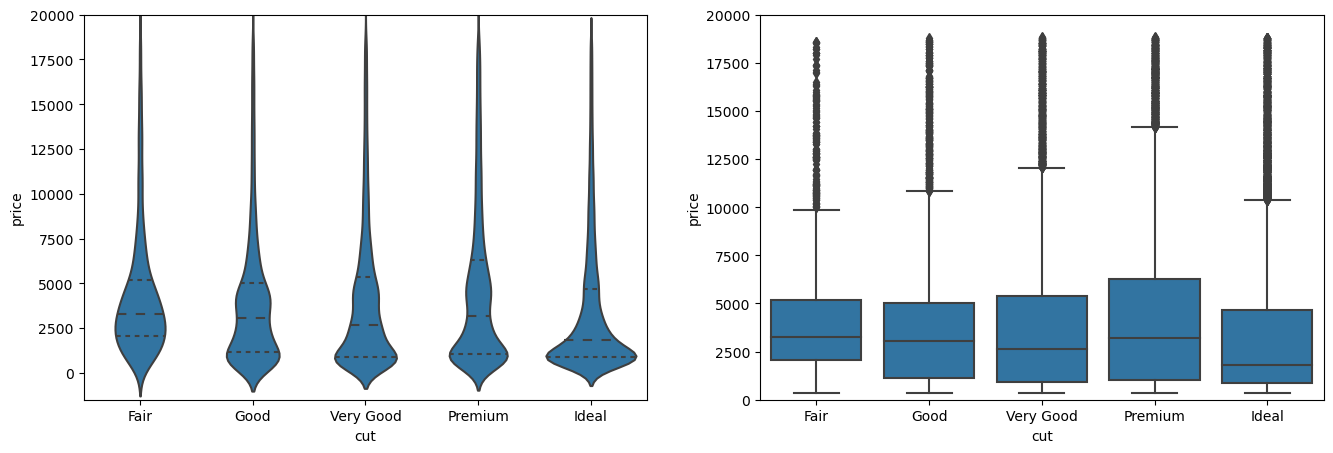

In [375]:
plt.figure(figsize=[16, 5])

# LEFT plot: violin plot
plt.subplot(1, 2, 1)
ax1 = sns.violinplot(data=diamonds, x='cut', y='price', color=default_plot_color, inner='quartile')
plt.yticks(np.arange(0, 20000+1, 2500))
plt.ylim(-1500, 20000)

# RIGHT plot: box plot
plt.subplot(1, 2, 2)
ax1 = sns.boxplot(data=diamonds, x='cut', y='price', color=default_plot_color)
plt.yticks(np.arange(0, 20000+1, 2500))
plt.ylim(0, 20000);

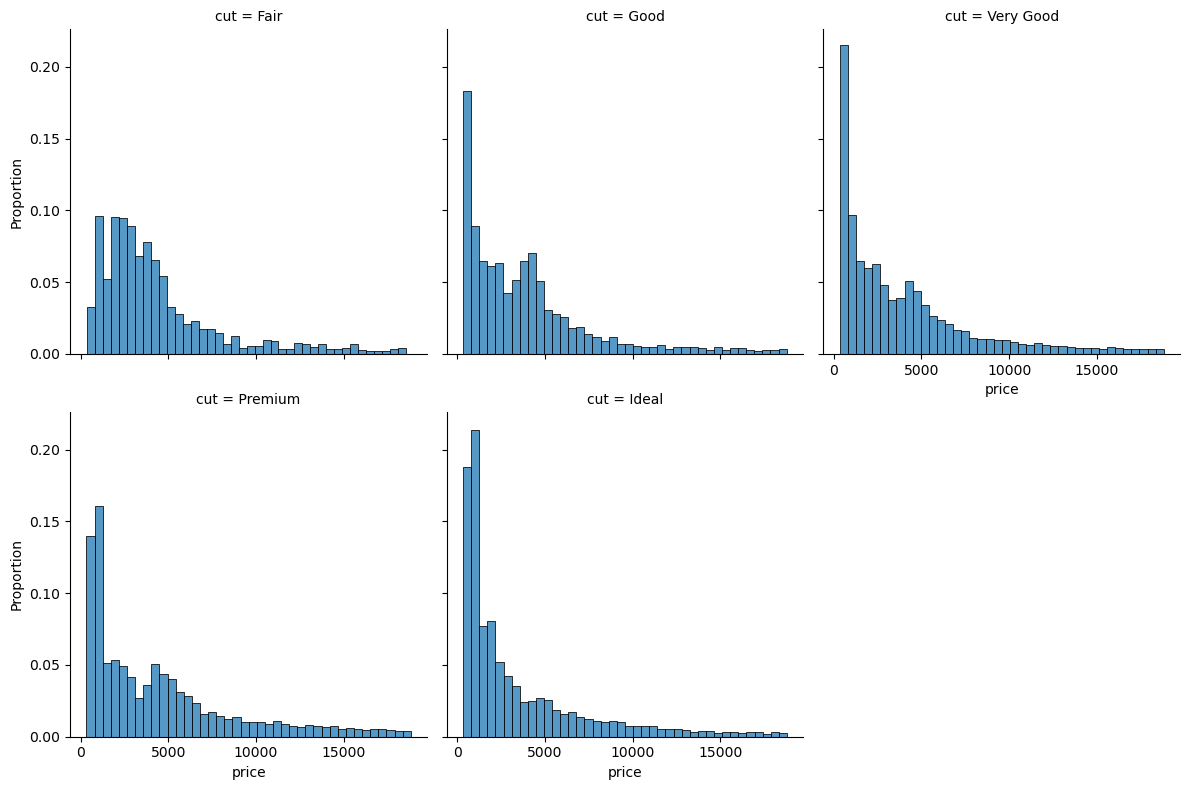

In [376]:
sns.FacetGrid(data=diamonds, col='cut', col_wrap=3, height=4).map(sns.histplot, 'price', color=default_plot_color, stat='proportion', bins=40);

### Price vs Color

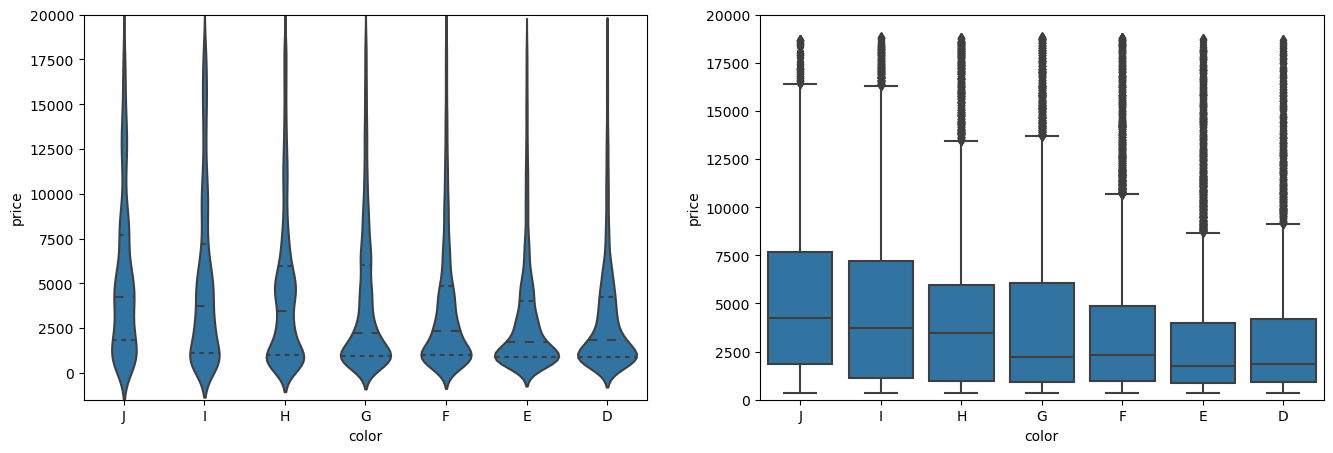

In [377]:
plt.figure(figsize=[16, 5])

# LEFT plot: violin plot
plt.subplot(1, 2, 1)
ax1 = sns.violinplot(data=diamonds, x='color', y='price', color=default_plot_color, inner='quartile')
plt.yticks(np.arange(0, 20000+1, 2500))
plt.ylim(-1500, 20000)

# RIGHT plot: box plot
plt.subplot(1, 2, 2)
ax1 = sns.boxplot(data=diamonds, x='color', y='price', color=default_plot_color)
plt.yticks(np.arange(0, 20000+1, 2500))
plt.ylim(0, 20000);

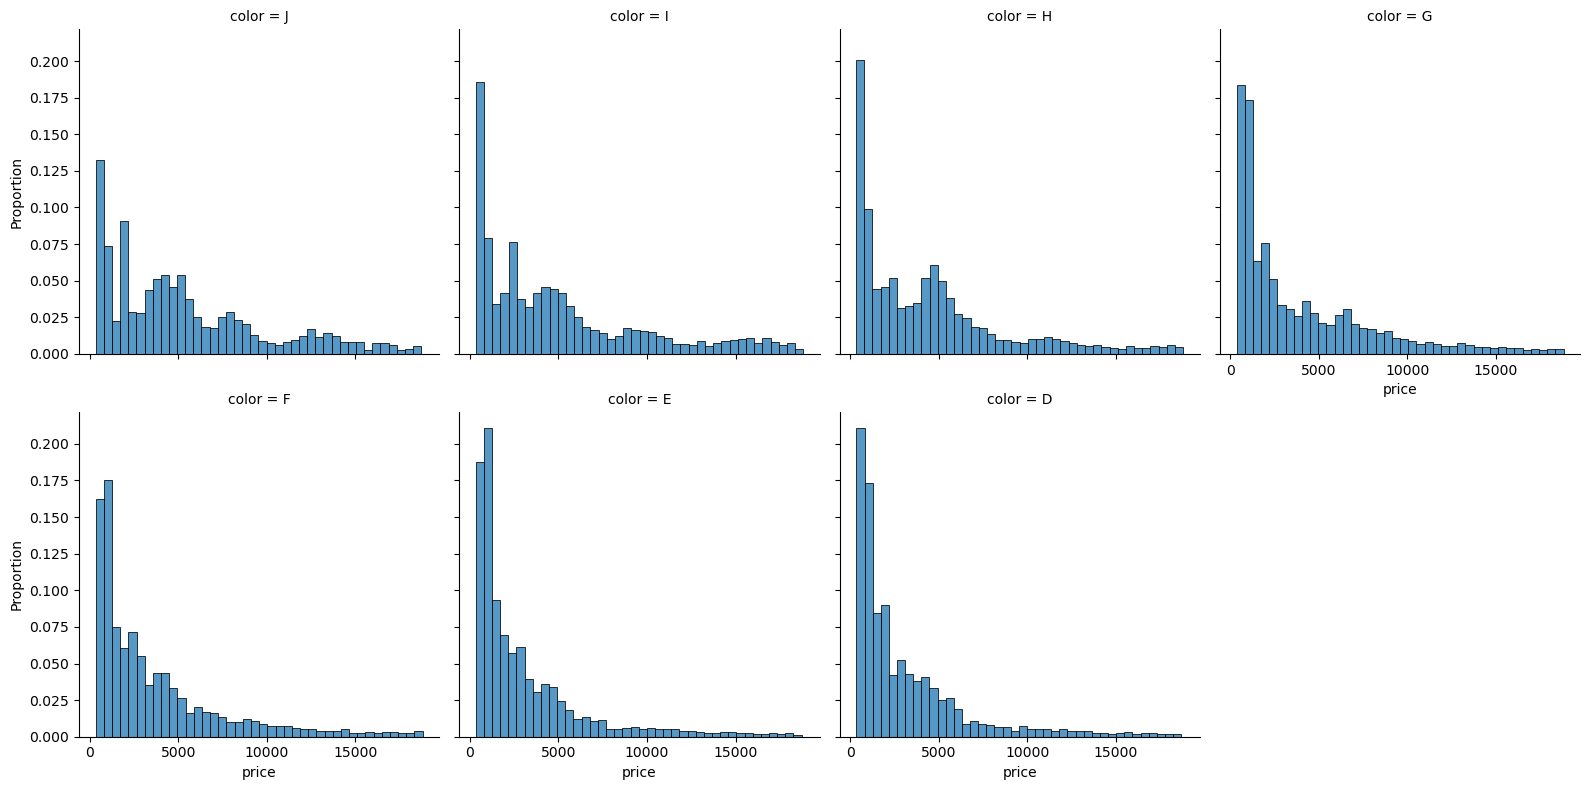

In [378]:
sns.FacetGrid(data=diamonds, col='color', col_wrap=4, height=4).map(sns.histplot, 'price', color=default_plot_color, stat='proportion', bins=40);

### Price vs Clarity

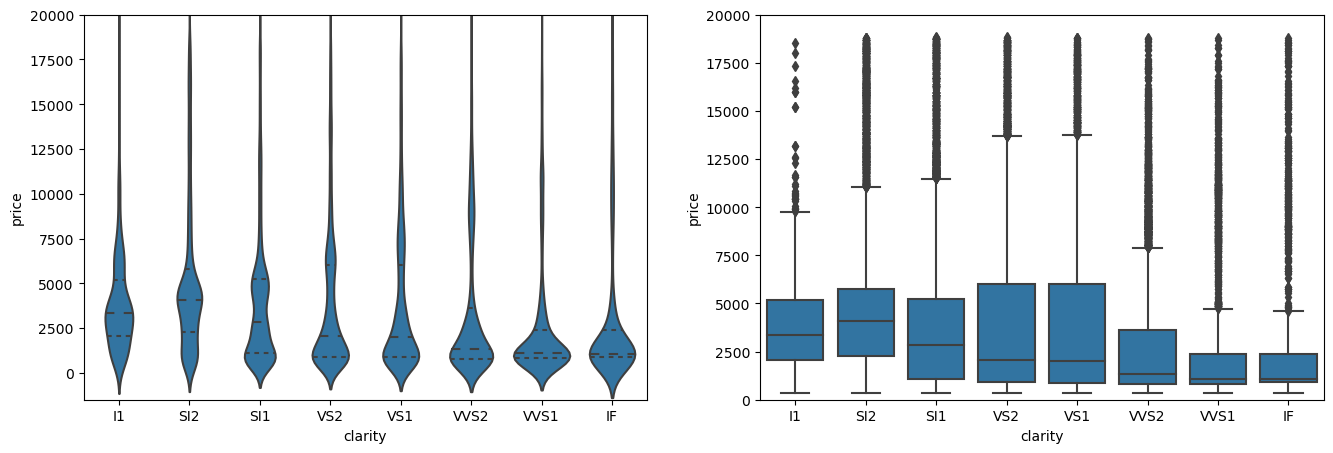

In [379]:
plt.figure(figsize=[16, 5])

# LEFT plot: violin plot
plt.subplot(1, 2, 1)
ax1 = sns.violinplot(data=diamonds, x='clarity', y='price', color=default_plot_color, inner='quartile')
plt.yticks(np.arange(0, 20000+1, 2500))
plt.ylim(-1500, 20000)

# RIGHT plot: box plot
plt.subplot(1, 2, 2)
ax1 = sns.boxplot(data=diamonds, x='clarity', y='price', color=default_plot_color)
plt.yticks(np.arange(0, 20000+1, 2500))
plt.ylim(0, 20000);


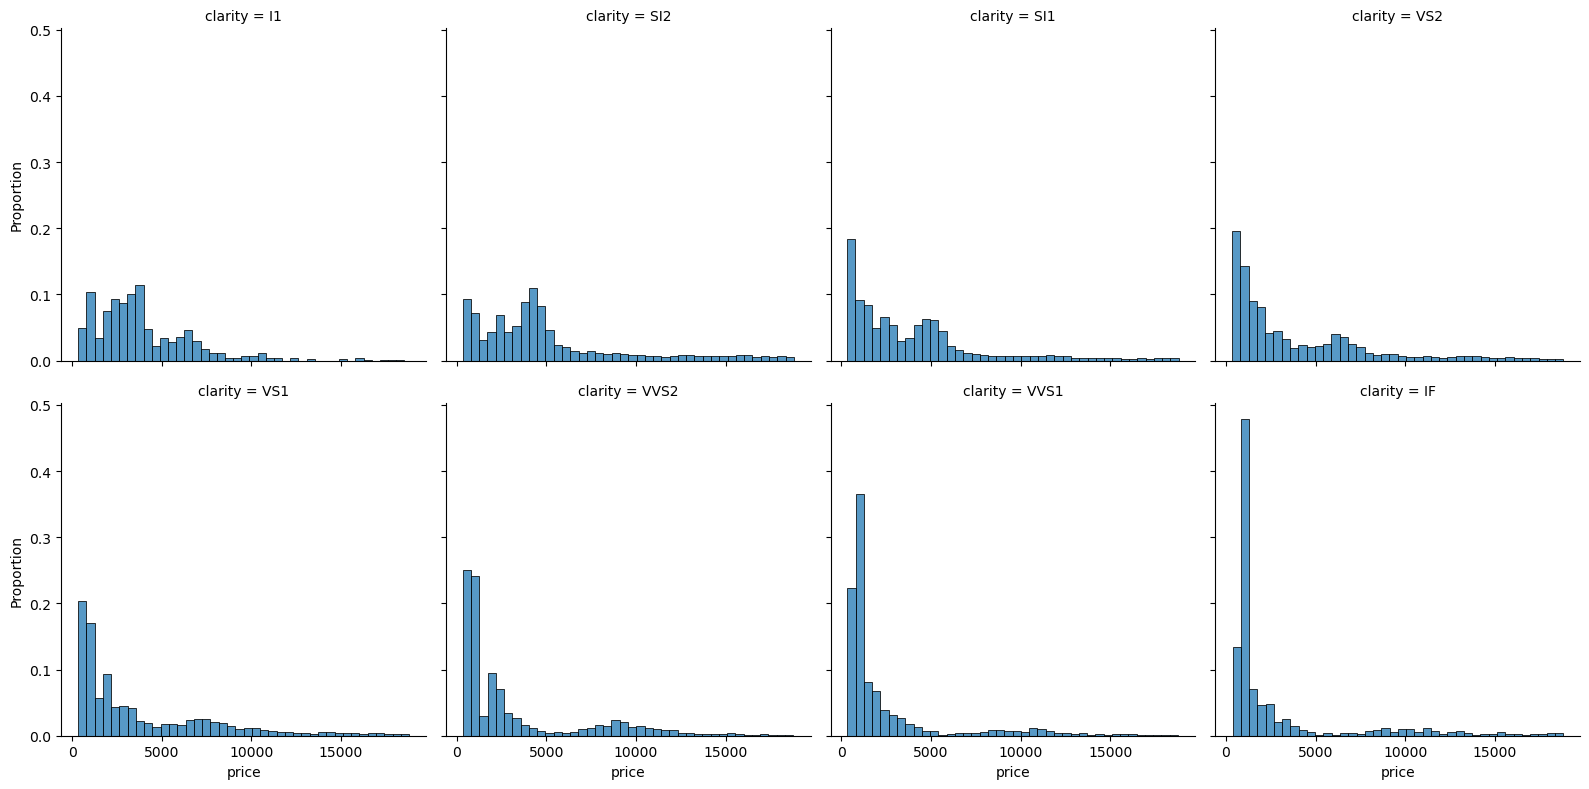

In [380]:
sns.FacetGrid(data=diamonds, col='clarity', col_wrap=4, height=4).map(sns.histplot, 'price', color=default_plot_color, stat='proportion', bins=40);

# Carat vs Categorical Variables

These plots should shed a lot more light into the patterns above. Larger diamonds are more likely to receive lower categorical quality grades, while high quality grades are more likely to have their numbers made up of smaller diamonds. Since carat weight appears to be a major driver of price, this helps to explain the surprising marginal effect of diamond quality against price.

### Carat vs Cut

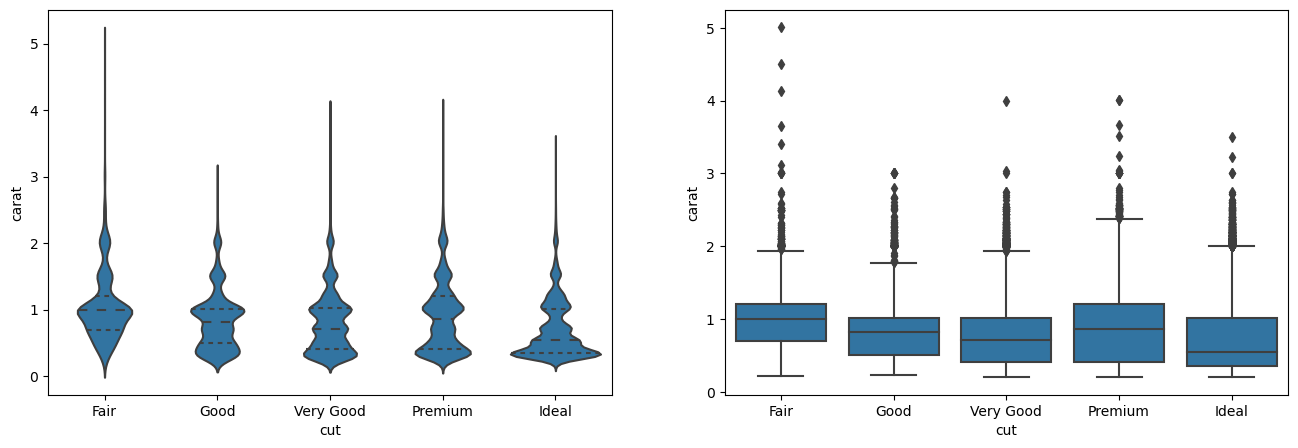

In [381]:
plt.figure(figsize=[16, 5])

# LEFT plot: violin plot
plt.subplot(1, 2, 1)
ax1 = sns.violinplot(data=diamonds, x='cut', y='carat', color=default_plot_color, inner='quartile')

# RIGHT plot: box plot
plt.subplot(1, 2, 2)
ax1 = sns.boxplot(data=diamonds, x='cut', y='carat', color=default_plot_color)

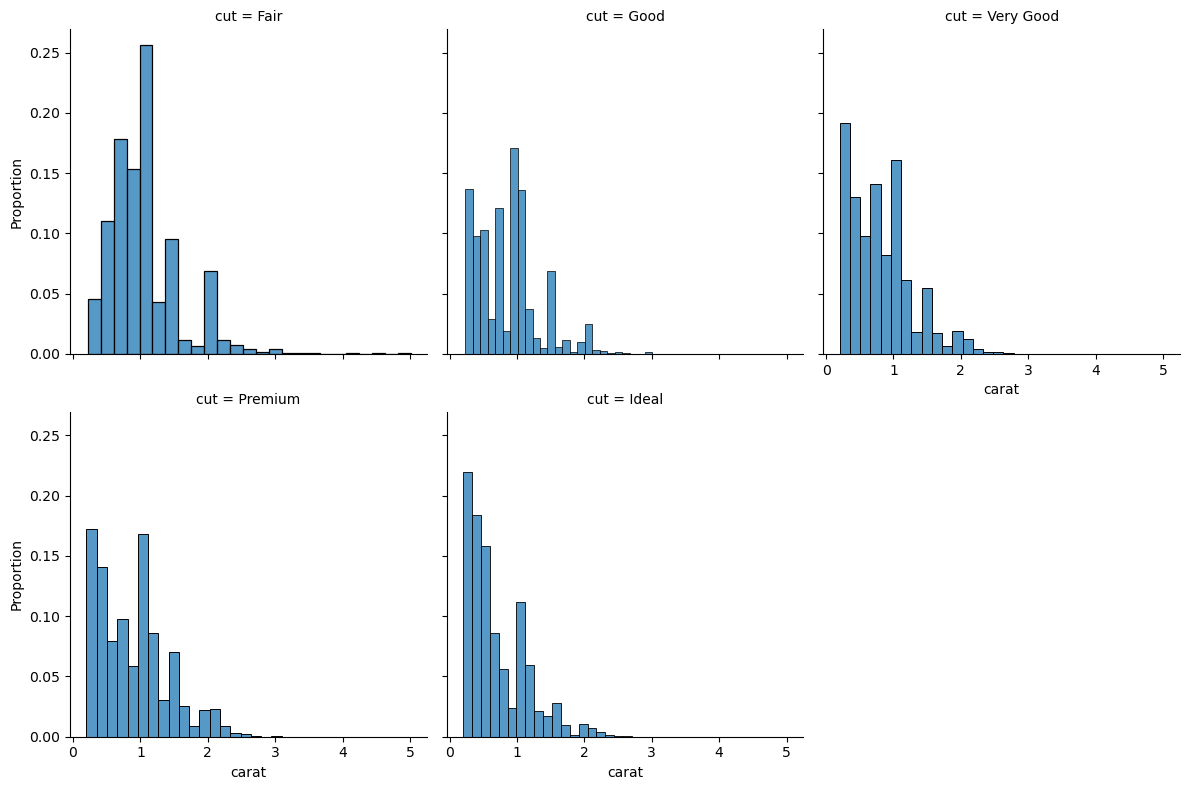

In [382]:
sns.FacetGrid(data=diamonds, col='cut', col_wrap=3, height=4).map(sns.histplot, 'carat', color=default_plot_color, stat='proportion', bins=25);

### Carat vs Color

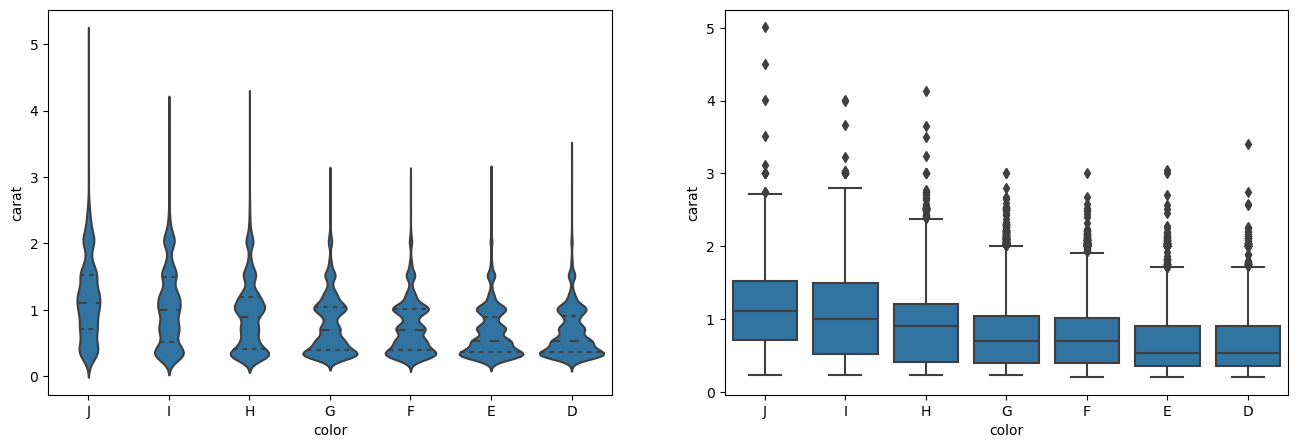

In [383]:
plt.figure(figsize=[16, 5])

# LEFT plot: violin plot
plt.subplot(1, 2, 1)
ax1 = sns.violinplot(data=diamonds, x='color', y='carat', color=default_plot_color, inner='quartile')

# RIGHT plot: box plot
plt.subplot(1, 2, 2)
ax1 = sns.boxplot(data=diamonds, x='color', y='carat', color=default_plot_color)

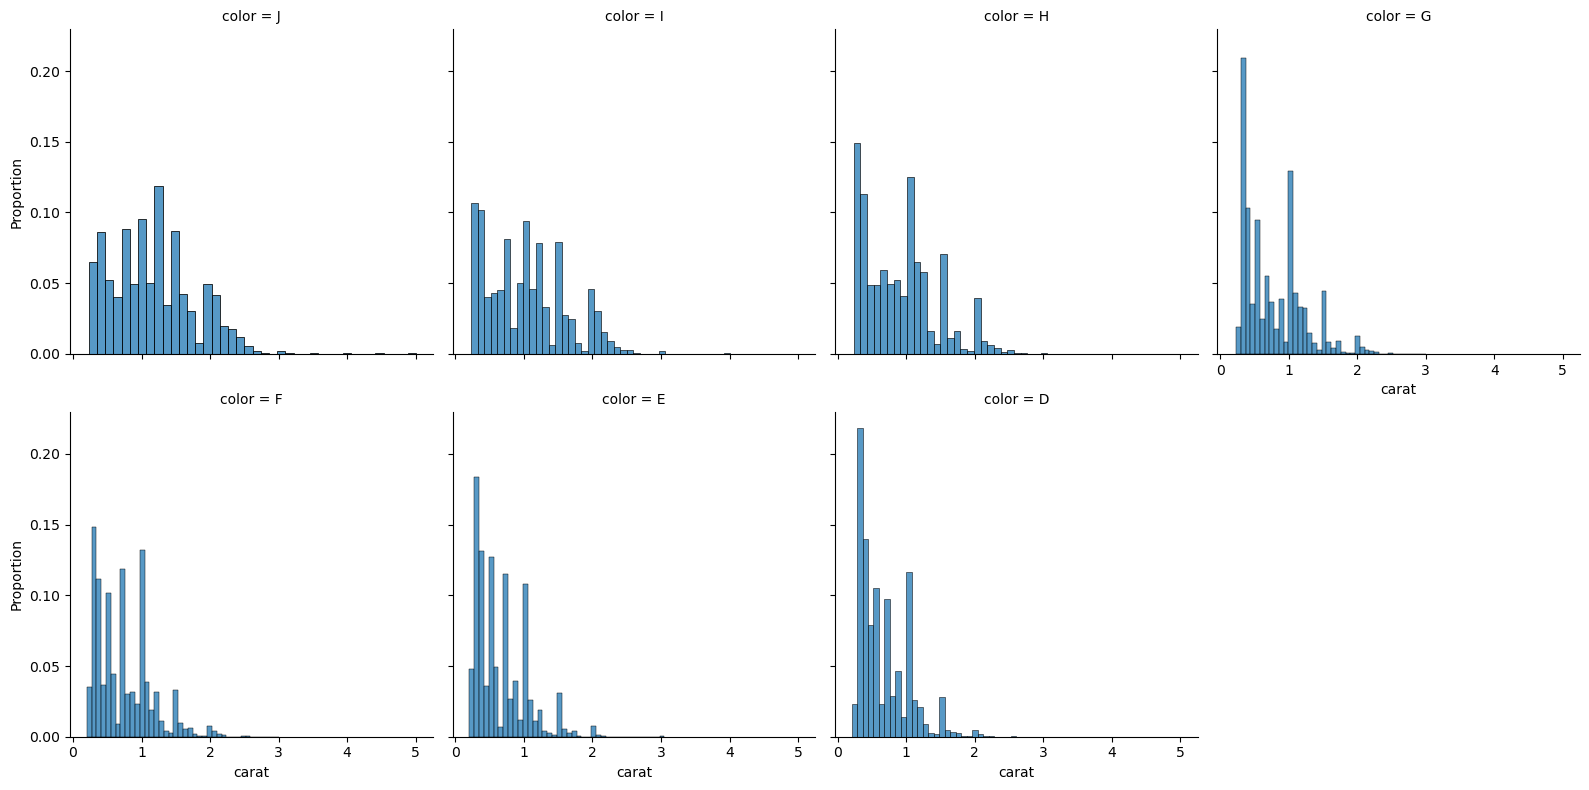

In [384]:
sns.FacetGrid(data=diamonds, col='color', col_wrap=4, height=4).map(sns.histplot, 'carat', color=default_plot_color, stat='proportion', bins=40);

### Carat vs Clarity

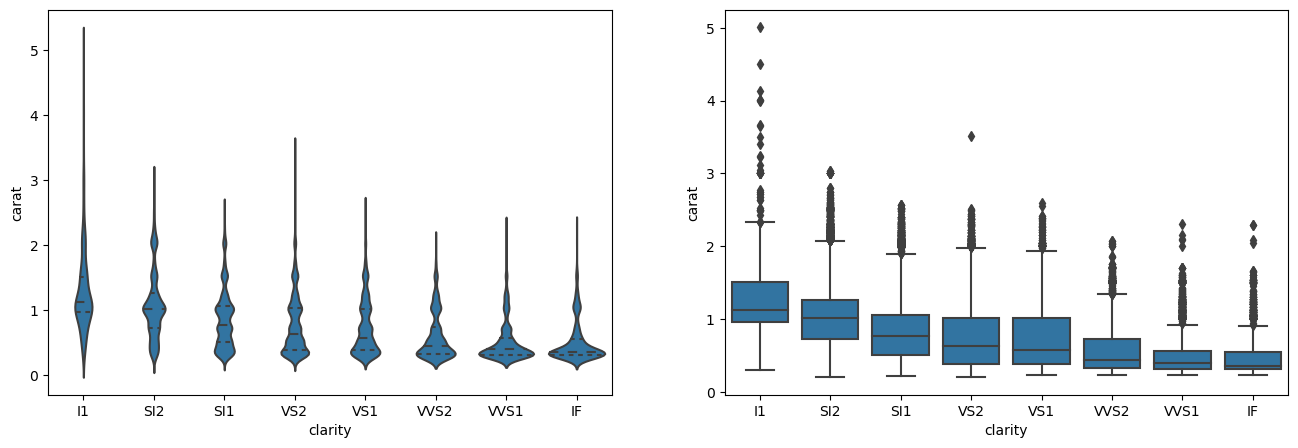

In [385]:
plt.figure(figsize=[16, 5])

# LEFT plot: violin plot
plt.subplot(1, 2, 1)
ax1 = sns.violinplot(data=diamonds, x='clarity', y='carat', color=default_plot_color, inner='quartile')

# RIGHT plot: box plot
plt.subplot(1, 2, 2)
ax1 = sns.boxplot(data=diamonds, x='clarity', y='carat', color=default_plot_color)


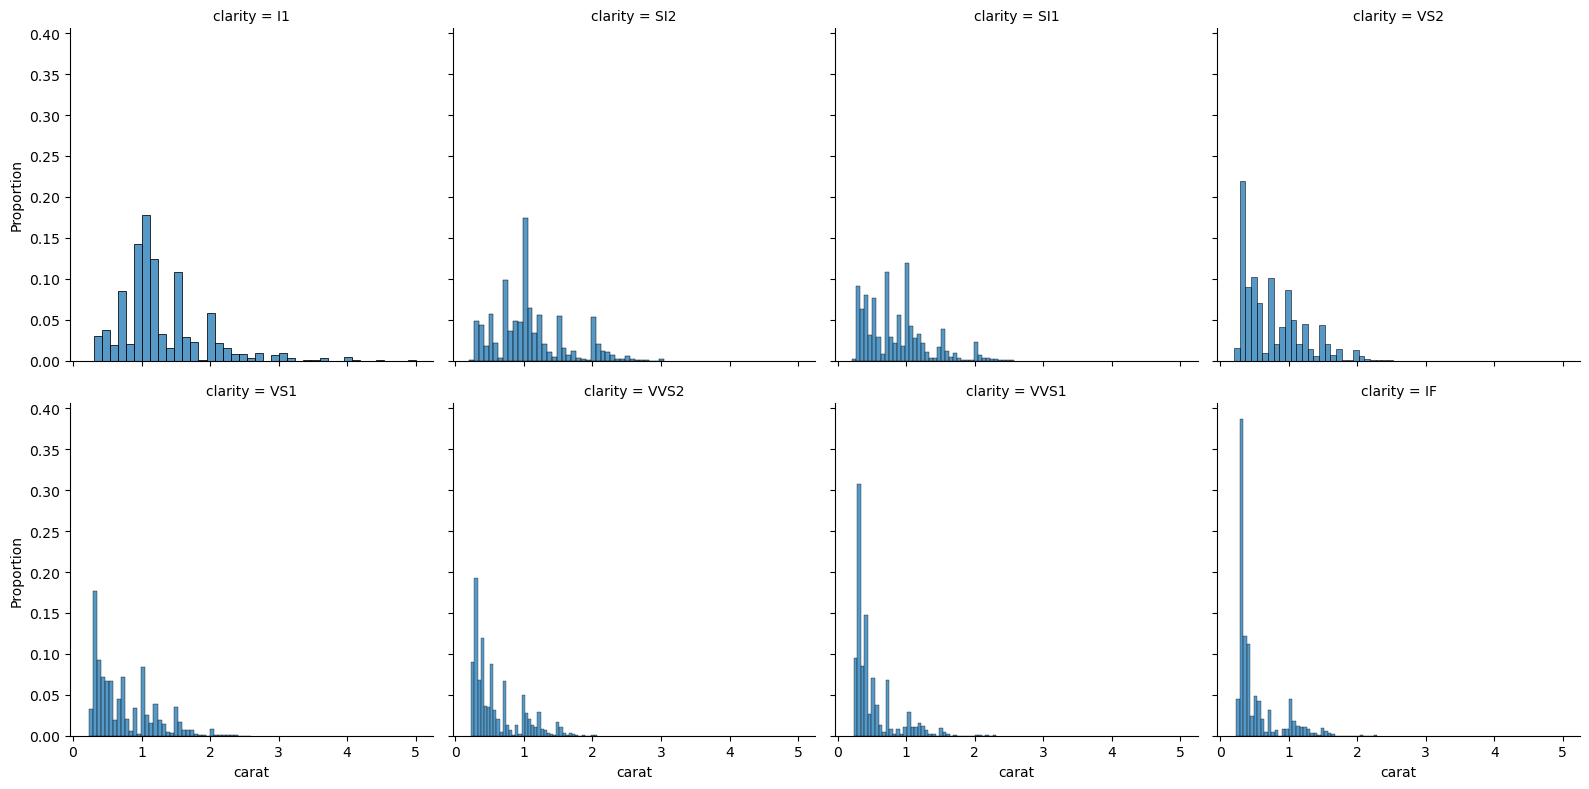

In [386]:
sns.FacetGrid(data=diamonds, col='clarity', col_wrap=4, height=4).map(sns.histplot, 'carat', color=default_plot_color, stat='proportion', bins=40);